# **Propose Code**

This is the propose code of "Prediction of Flight Time Deviation for Lithuanian Airports Using
Supervised Machine Learning Model". It contains 2 dataset which are Arrival Dataset and Departure Dataset. In this i have used CMIM technique for feature selection and SMOTE technique for oversampling and i have applied three algorithm which are XGBoost classifier , LGBMClassifier , AdaBoost classifier, the highest accuracy is 99% in both the dataset i.e, Arrival and Departure.

# **IMPORTING LIBRARY**

In [1]:
# importing all the required libraries
import numpy as np
# for numeric data 
import pandas as PD
# for reading the database 
import matplotlib.pyplot as plt 
# for understanding the database 
import seaborn as sns
# for heat map
from sklearn import metrics  
# to check accuracy  
from sklearn.metrics import accuracy_score 

In [2]:
!pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 3.1 MB/s 


# **UPLOADING THE DATASET**

In [3]:
# UPLOADING the arrival dataset
A_data = PD.read_csv("/content/dataset_arrival_unique_weather.csv", encoding = 'ISO-8859-1' , sep=';')


In [4]:
# uploading the departure dataset
D_data = PD.read_csv('/content/dataset_departure_unique_weather.csv', encoding = 'ISO-8859-1', sep=';')

In [5]:
PD.set_option('max_columns', None) # for visibility of all the columns

In [6]:
A_data.head() # printing strting five rows of arrival dataset


,DATE,COMPANY,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,LANDED TIME,CLASS
0,2019-10-25,SAS,SAS,Kopenhaga,PalangaPLQ,13,Fog.,7 km/h,150,4 km,00:55:00,01:18:00,"Delay (15,30] min."
1,2019-10-25,AirBaltic,AirBaltic,TalinasTLL,VilniusVNO,11 °C,Sunny.,22 km/h,180,16 km,10:15:00,10:14:00,"On Time [-5, 5] min."
2,2019-10-25,WizzAir,WizzAir,Londonas/Lutonas,PalangaPLQ,13 °C,Drizzle. Dense fog.,6 km/h,200,1 km,10:20:00,10:07:00,"Early [-15,-5) min."
3,2019-10-25,CorendonEurope,CorendonEurope,HurgadaHRG,VilniusVNO,11 °C,Sunny.,22 km/h,180,16 km,10:30:00,10:28:00,"On Time [-5, 5] min."
4,2019-10-25,ScandinavianAirlines,ScandinavianAirlines,KopenhagaCPH,VilniusVNO,11 °C,Sunny.,22 km/h,180,16 km,10:35:00,10:43:00,"Delay (5, 15] min."


In [7]:
D_data.head() # print starting five rows of departure dataset

,DATE,COMPANY,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,DEPARTURE TIME,CLASS
0,2019-10-25,AirBaltic,AirBaltic,PalangaPLQ,Ryga,12 °C,Fog.,4 km/h,170,2 km,05:40:00,05:34:00,"Early [-15,-5) min."
1,2019-10-25,SAS,SAS,PalangaPLQ,Kopenhaga,12 °C,Fog.,4 km/h,170,2 km,07:00:00,06:56:00,"On Time [-5, 5] min."
2,2019-10-25,AirBaltic,AirBaltic,VilniusVNO,RygaRIX,11 °C,Sunny.,26 km/h,180,16 km,10:45:00,10:45:00,"On Time [-5, 5] min."
3,2019-10-25,WizzAir,WizzAir,PalangaPLQ,Londonas/Lutonas,13 °C,Drizzle. Dense fog.,6 km/h,200,1 km,10:50:00,10:55:00,"On Time [-5, 5] min."
4,2019-10-25,Aeroflot,Aeroflot,VilniusVNO,MaskvaSVO,11 °C,Sunny.,22 km/h,190,16 km,11:05:00,11:05:00,"On Time [-5, 5] min."


In [9]:
A_data.shape # to get shape of Arrival dataset

(7409, 13)

In [10]:
D_data.shape  # to get the shape of departure dataset

(7057, 13)

In [11]:
A_data.tail()  # to display the last five rows of arrival dataset

,DATE,COMPANY,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,LANDED TIME,CLASS
7404,2020-03-14,WizzAir,WizzAir,LondonasLTN,VilniusVNO,1 °C,Snow showers. Passing clouds.,20 km/h,220,4 km,02:35:00,02:06:00,"Early (-inf, -15) min."
7405,2020-03-14,WizzAir,WizzAir,ReikjavikasKEF,VilniusVNO,1 °C,Snow flurries. Passing clouds.,19 km/h,210,NaN,03:15:00,02:54:00,"Early (-inf, -15) min."
7406,2020-03-14,NaN,NaN,MilanasMXP,VilniusVNO,2 °C,Passing clouds.,17 km/h,220,NaN,03:45:00,04:18:00,"Delay (30, inf) min."
7407,2020-03-14,AirBaltic,AirBaltic,RygaRIX,VilniusVNO,-2 °C,Snow flurries. Partly sunny.,41 km/h,350,NaN,08:30:00,08:34:00,"On Time [-5, 5] min."
7408,2020-03-14,HOLIDAYEUROPE,HOLIDAYEUROPE,HurgadaHRG,VilniusVNO,-2 °C,Snow flurries. Partly sunny.,41 km/h,350,NaN,08:40:00,08:16:00,"Early (-inf, -15) min."


In [12]:
D_data.tail()  # to display the last five rows of departure dataset

,DATE,COMPANY,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,DEPARTURE TIME,CLASS
7052,2020-03-16,UkraineInternationalAirlines,UkraineInternationalAirlines,VilniusVNO,KijevasKBP,7 °C,Sunny.,24 km/h,210,16 km,17:05:00,22:53:00,"Delay (30, inf) min."
7053,2020-03-16,Belavia,Belavia,VilniusVNO,MinskasMSQ,7 °C,Sunny.,20 km/h,210,16 km,17:40:00,17:40:00,"On Time [-5, 5] min."
7054,2020-03-16,Ryanair,Ryanair,KaunasKUN,BristolisBRS,4 °C,Drizzle. Mostly cloudy.,19 km/h,240,8 km,20:55:00,21:14:00,"Delay (15,30] min."
7055,2020-03-16,AirBaltic,AirBaltic,PalangaPLQ,Ryga,4 °C,Clear.,11 km/h,200,20 km,05:50:00,05:47:00,"On Time [-5, 5] min."
7056,2020-03-16,AirBaltic,AirBaltic,PalangaPLQ,Ryga,4 °C,Light rain. Overcast.,9 km/h,250,11 km,15:10:00,15:22:00,"Delay (5, 15] min."


In [13]:
len(A_data.columns) # to get the length of the columns 

13

In [14]:
A_data.columns # to get the names of all the columns  of arrival dataset

Index(['DATE', 'COMPANY', 'COMPANY.1', 'TO', 'FROM', 'TEMPERATURE',
       'SKY INFORMATION', 'WIND SPEED', 'WIND ANGLE', 'VISIBILITY',
       'SCHEDULED TIME', 'LANDED TIME', 'CLASS'],
      dtype='object')

In [15]:
D_data.columns # to get the columns name of departure dataset

Index(['DATE', 'COMPANY', 'COMPANY.1', 'TO', 'FROM', 'TEMPERATURE',
       'SKY INFORMATION', 'WIND SPEED', 'WIND ANGLE', 'VISIBILITY',
       'SCHEDULED TIME', 'DEPARTURE TIME', 'CLASS'],
      dtype='object')

In [16]:
# define color containing variable
cmap = ['vlag', 'gnuplot_r', 'Purples_r', 'Oranges', 'Greys', 'Spectral_r', 'tab20_r', 'RdYlBu', 'Reds_r', 'viridis', 'PuBu', 'RdPu_r', 'Wistia', 'Wistia_r', 'flag', 'PuOr', 'Set1_r', 'YlGnBu_r', 'autumn_r', 'bwr_r', 'Paired', 'RdYlGn', 'hot_r', 'PiYG_r', 'icefire_r', 'Set2_r', 'PuRd', 'Blues_r', 'OrRd', 'pink_r', 'gray_r', 'gist_yarg_r', 'gnuplot2_r', 'Dark2_r', 'rocket', 'gist_rainbow', 'BuPu_r', 'bwr', 'BuGn', 'PRGn_r', 'prism', 'gnuplot', 'YlGn', 'plasma', 'Pastel1_r', 'tab20c_r', 'PiYG', 'terrain_r', 'ocean', 'GnBu_r', 'Blues', 'brg_r', 'binary_r', 'gist_gray', 'rocket_r', 'gist_earth', 'cubehelix_r', 'Pastel2_r', 'Set3', 'Purples', 'afmhot_r', 'icefire', 'cool_r', 'seismic', 'gist_gray_r', 'flag_r', 'RdYlGn_r', 'Set2', 'Set3_r', 'jet', 'gray', 'rainbow_r', 'nipy_spectral', 'Reds', 'gist_heat_r', 'Dark2', 'inferno_r', 'viridis_r', 'spring', 'Accent', 'cividis_r', 'tab20b_r', 'terrain', 'YlOrBr', 'rainbow', 'magma', 'gist_ncar_r', 'gist_stern', 'Oranges_r', 'winter', 'bone_r', 'BuPu', 'magma_r', 'RdBu', 'binary', 'ocean_r', 'RdGy_r', 'gist_rainbow_r', 'BrBG_r', 'inferno', 'Accent_r', 'PuOr_r', 'YlOrBr_r', 'Paired_r', 'pink', 'Greens', 'plasma_r', 'tab20c', 'tab10_r', 'GnBu', 'hsv', 'YlOrRd', 'winter_r', 'Set1', 'YlOrRd_r', 'PuRd_r', 'prism_r', 'mako', 'cividis', 'CMRmap', 'RdGy', 'summer_r', 'coolwarm_r', 'YlGn_r', 'bone', 'gnuplot2', 'BuGn_r', 'PuBuGn', 'copper_r', 'tab20b', 'RdBu_r', 'PRGn', 'jet_r', 'gist_ncar', 'PuBu_r', 'Pastel1', 'hot', 'copper', 'YlGnBu', 'brg', 'Pastel2', 'tab10', 'Greens_r', 'cubehelix', 'Greys_r', 'spring_r', 'tab20', 'gist_stern_r', 'vlag_r', 'PuBuGn_r', 'gist_earth_r', 'mako_r', 'cool', 'hsv_r', 'nipy_spectral_r', 'gist_yarg', 'OrRd_r', 'seismic_r', 'afmhot', 'summer', 'coolwarm', 'CMRmap_r', 'Spectral', 'BrBG', 'gist_heat', 'RdPu', 'RdYlBu_r', 'autumn']

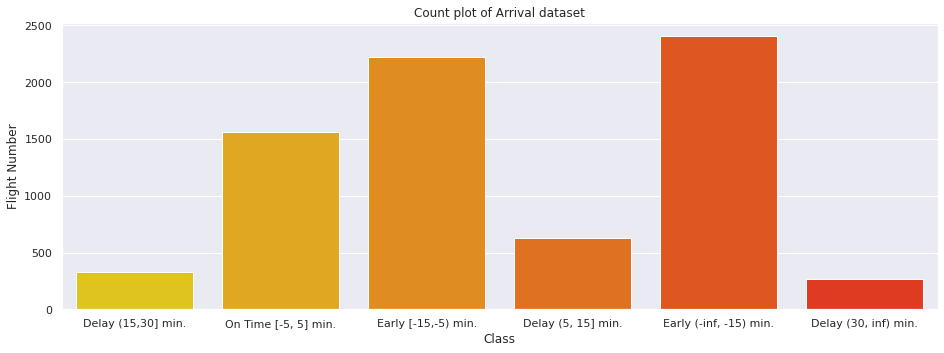

In [18]:
#count plot graph of target variable in arrival dataset
import random
sns.set_palette(random.choice(cmap))
sns.countplot(x='CLASS',data=A_data) 
sns.set(rc={'figure.figsize':(15.7,5.27)})
# assigning the name of x-axis
plt.xlabel ( 'Class')
# assigning the name of y-axis
plt.ylabel ( 'Flight Number')
plt.title ( 'Count plot of Arrival dataset')
plt.show()  

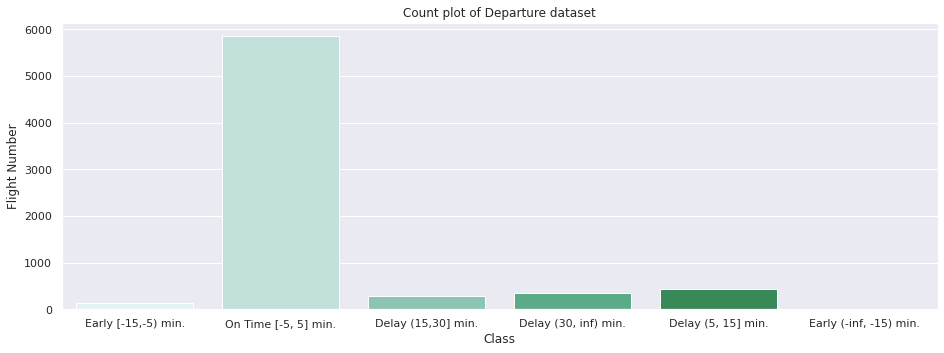

In [19]:
#count plot graph of target variable in departure dataset
import random
sns.set_palette(random.choice(cmap))
sns.countplot(x='CLASS',data=D_data)
# assigning the name of x-axis
plt.xlabel ( 'Class')
# assigning the name of y-axis
plt.ylabel ( 'Flight Number')
plt.title ( 'Count plot of Departure dataset')  
plt.show()  

In [20]:
A_data.info() # to get the information about the arrival dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATE             7409 non-null   object
 1   COMPANY          7331 non-null   object
 2   COMPANY.1        7331 non-null   object
 3   TO               7409 non-null   object
 4   FROM             7409 non-null   object
 5   TEMPERATURE      7409 non-null   object
 6   SKY INFORMATION  7409 non-null   object
 7   WIND SPEED       7409 non-null   object
 8   WIND ANGLE       7409 non-null   int64 
 9   VISIBILITY       3780 non-null   object
 10  SCHEDULED TIME   7409 non-null   object
 11  LANDED TIME      7407 non-null   object
 12  CLASS            7409 non-null   object
dtypes: int64(1), object(12)
memory usage: 752.6+ KB


In [22]:
D_data.info()  # to get the information about the departure dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7057 entries, 0 to 7056
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATE             7057 non-null   object
 1   COMPANY          6983 non-null   object
 2   COMPANY.1        6983 non-null   object
 3   TO               7057 non-null   object
 4   FROM             7057 non-null   object
 5   TEMPERATURE      7057 non-null   object
 6   SKY INFORMATION  7057 non-null   object
 7   WIND SPEED       7057 non-null   object
 8   WIND ANGLE       7057 non-null   int64 
 9   VISIBILITY       3762 non-null   object
 10  SCHEDULED TIME   7057 non-null   object
 11  DEPARTURE TIME   7057 non-null   object
 12  CLASS            7057 non-null   object
dtypes: int64(1), object(12)
memory usage: 716.9+ KB


In [23]:
A_data.nunique # to get the unique values of arrival dataset

<bound method DataFrame.nunique of             DATE               COMPANY             COMPANY.1  \
0     2019-10-25                   SAS                   SAS   
1     2019-10-25             AirBaltic             AirBaltic   
2     2019-10-25               WizzAir               WizzAir   
3     2019-10-25        CorendonEurope        CorendonEurope   
4     2019-10-25  ScandinavianAirlines  ScandinavianAirlines   
...          ...                   ...                   ...   
7404  2020-03-14               WizzAir               WizzAir   
7405  2020-03-14               WizzAir               WizzAir   
7406  2020-03-14                   NaN                   NaN   
7407  2020-03-14             AirBaltic             AirBaltic   
7408  2020-03-14         HOLIDAYEUROPE         HOLIDAYEUROPE   

                    TO        FROM TEMPERATURE  \
0            Kopenhaga  PalangaPLQ          13   
1           TalinasTLL  VilniusVNO       11 °C   
2     Londonas/Lutonas  PalangaPLQ       13 °C

In [24]:
D_data.nunique  # to get the unique values of departure dataset

<bound method DataFrame.nunique of             DATE                       COMPANY                     COMPANY.1  \
0     2019-10-25                     AirBaltic                     AirBaltic   
1     2019-10-25                           SAS                           SAS   
2     2019-10-25                     AirBaltic                     AirBaltic   
3     2019-10-25                       WizzAir                       WizzAir   
4     2019-10-25                      Aeroflot                      Aeroflot   
...          ...                           ...                           ...   
7052  2020-03-16  UkraineInternationalAirlines  UkraineInternationalAirlines   
7053  2020-03-16                       Belavia                       Belavia   
7054  2020-03-16                       Ryanair                       Ryanair   
7055  2020-03-16                     AirBaltic                     AirBaltic   
7056  2020-03-16                     AirBaltic                     AirBaltic   

    

# **PREPROCESSING**

In [25]:
A_data.isna().sum() # to check the null values

DATE                  0
COMPANY              78
COMPANY.1            78
TO                    0
FROM                  0
TEMPERATURE           0
SKY INFORMATION       0
WIND SPEED            0
WIND ANGLE            0
VISIBILITY         3629
SCHEDULED TIME        0
LANDED TIME           2
CLASS                 0
dtype: int64

In [26]:
#filling the null value
A_data['COMPANY'].fillna(A_data['COMPANY'].mode()[0], inplace=True)
A_data['COMPANY.1'].fillna(A_data['COMPANY.1'].mode()[0], inplace=True)
A_data['VISIBILITY'].fillna(A_data['VISIBILITY'].mode()[0], inplace=True)
A_data['LANDED TIME'].fillna(A_data['LANDED TIME'].mode()[0], inplace=True)


In [27]:
D_data.isna().sum() # to check the null values in departure dataset

DATE                  0
COMPANY              74
COMPANY.1            74
TO                    0
FROM                  0
TEMPERATURE           0
SKY INFORMATION       0
WIND SPEED            0
WIND ANGLE            0
VISIBILITY         3295
SCHEDULED TIME        0
DEPARTURE TIME        0
CLASS                 0
dtype: int64

In [28]:
# to fill the null values
D_data['COMPANY'].fillna(D_data['COMPANY'].mode()[0], inplace=True)
D_data['COMPANY.1'].fillna(D_data['COMPANY.1'].mode()[0], inplace=True)
D_data['VISIBILITY'].fillna(D_data['VISIBILITY'].mode()[0], inplace=True)


In [29]:
# import preprocessing
from sklearn import preprocessing
# initialization
label_encoder = preprocessing.LabelEncoder()

In [30]:
A_data['DATE']= label_encoder.fit_transform(A_data['DATE']) 
#to encode the data attribute

In [31]:
# for encoding the categorical data
A_data['COMPANY']= label_encoder.fit_transform(A_data['COMPANY']) 
#to encode the company attribute
A_data['COMPANY.1']= label_encoder.fit_transform(A_data['COMPANY.1']) 
A_data['TO']= label_encoder.fit_transform(A_data['TO']) 
# to encode the To data 
A_data['FROM']= label_encoder.fit_transform(A_data['FROM']) 
A_data['TEMPERATURE']= label_encoder.fit_transform(A_data['TEMPERATURE'])
# to encode the temperature data  
A_data['SKY INFORMATION']= label_encoder.fit_transform(A_data['SKY INFORMATION']) 
A_data['WIND SPEED']= label_encoder.fit_transform(A_data['WIND SPEED'])
# encoding the wind speed attribute  
A_data['VISIBILITY']= label_encoder.fit_transform(A_data['VISIBILITY']) 
A_data['SCHEDULED TIME']= label_encoder.fit_transform(A_data['SCHEDULED TIME'])
# to encode the scheduled time data  
A_data['LANDED TIME']= label_encoder.fit_transform(A_data['LANDED TIME']) 
A_data['CLASS']= label_encoder.fit_transform(A_data['CLASS']) 

In [32]:
A_data.head() # to display the data 

,DATE,COMPANY,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,LANDED TIME,CLASS
0,0,22,24,41,1,13,12,26,150,33,7,77,0
1,0,2,2,93,2,11,83,8,180,18,59,316,5
2,0,28,30,52,1,14,6,25,200,5,60,309,4
3,0,9,9,34,2,11,83,8,180,18,62,330,5
4,0,23,25,42,2,11,83,8,180,18,63,345,2


In [33]:
# encoding of departure dataset
D_data['DATE']= label_encoder.fit_transform(D_data['DATE']) 
D_data['COMPANY']= label_encoder.fit_transform(D_data['COMPANY'])
#to encode the company.1 attribute 
D_data['COMPANY.1']= label_encoder.fit_transform(D_data['COMPANY.1']) 
D_data['TO']= label_encoder.fit_transform(D_data['TO']) 
#to encode the from attribute
D_data['FROM']= label_encoder.fit_transform(D_data['FROM']) 
D_data['TEMPERATURE']= label_encoder.fit_transform(D_data['TEMPERATURE'])
#to encode the temperature attribute 
D_data['SKY INFORMATION']= label_encoder.fit_transform(D_data['SKY INFORMATION']) 
D_data['WIND SPEED']= label_encoder.fit_transform(D_data['WIND SPEED'])
# encoding the wind speed data  
D_data['VISIBILITY']= label_encoder.fit_transform(D_data['VISIBILITY']) 
# enccoding the visibility data 
D_data['SCHEDULED TIME']= label_encoder.fit_transform(D_data['SCHEDULED TIME']) 
D_data['DEPARTURE TIME']= label_encoder.fit_transform(D_data['DEPARTURE TIME']) 
D_data['CLASS']= label_encoder.fit_transform(D_data['CLASS']) 

In [34]:
D_data.head() # displaying 50 rows of departure dataset

,DATE,COMPANY,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,DEPARTURE TIME,CLASS
0,0,2,2,1,93,9,13,17,170,14,15,18,4
1,0,26,28,1,48,9,13,17,170,14,31,86,5
2,0,2,2,2,94,8,88,9,180,9,70,217,5
3,0,32,34,1,60,10,7,19,200,2,71,227,5
4,0,1,1,2,73,8,88,7,190,9,74,237,5


# **SPLITTING THE ARRIVAL DATASET**

In [35]:
x=A_data.iloc[:,:-1] # SPLITTING THE DEPENDENT AND INDEPENDENT VARIABLE OF DEPARTURE DATASET
y= A_data['CLASS']

In [36]:
x.shape  # to check the shape of independent variable 

(7409, 12)

In [37]:
y.shape  # to check the shape of dependent variable 

(7409,)

In [38]:
A_data["CLASS"].value_counts()   # to count the different class values of target variable 

3    2402
4    2221
5    1559
2     624
0     332
1     271
Name: CLASS, dtype: int64

In [39]:
A_data.groupby('CLASS').describe().T  # description of target variable

CLASS                        0            1            2            3  \
DATE        count   332.000000   271.000000   624.000000  2402.000000   
            mean     54.268072    59.298893    54.073718    65.206078   
            std      33.854101    36.522585    35.977312    38.419997   
            min       0.000000     0.000000     0.000000     0.000000   
            25%      26.750000    31.000000    22.000000    30.000000   
...                        ...          ...          ...          ...   
LANDED TIME min       0.000000     2.000000     2.000000     0.000000   
            25%     333.000000   380.500000   330.750000   378.250000   
            50%     589.000000   608.000000   577.000000   605.000000   
            75%     806.250000   838.500000   813.500000   843.000000   
            max    1135.000000  1133.000000  1135.000000  1135.000000   

CLASS                        4            5  
DATE        count  2221.000000  1559.000000  
            mean     62.969383    57.897370  
            std      37.115949    36.152806  
            min       0.000000     0.000000  
            25%      29.000000    27.000000  
...                        ...          ...  
LANDED TIME min       0.000000     0.000000  
            25%     387.000000   340.000000  
            50%     603.000000   583.000000  
            75%     837.000000   801.500000  
            max    1135.000000  1124.000000  

[96 rows x 6 columns]

In [40]:
x.head() # to print the independent variable 

,DATE,COMPANY,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,LANDED TIME
0,0,22,24,41,1,13,12,26,150,33,7,77
1,0,2,2,93,2,11,83,8,180,18,59,316
2,0,28,30,52,1,14,6,25,200,5,60,309
3,0,9,9,34,2,11,83,8,180,18,62,330
4,0,23,25,42,2,11,83,8,180,18,63,345


In [41]:
y.head()  # to print the data of dependent variable 

0    0
1    5
2    4
3    5
4    2
Name: CLASS, dtype: int64

In [42]:
# importing feature selection library
from skfeature.function.information_theoretical_based import CMIM
from sklearn.feature_selection import mutual_info_classif

In [43]:
features_cal_cmim = CMIM.cmim(x.values,y.values, n_selected_features=44)
# performing feature selection 
ext_fcmim = A_data.columns[features_cal_cmim]
x = A_data[ext_fcmim]
#to target the independent feature 
y = A_data['CLASS']
# to target dependent column
# draw out the x , y data 
importance = mutual_info_classif(x, y)
#identifying importance 
ig_importance = PD.Series(importance, index=x.columns)
#examine the importance

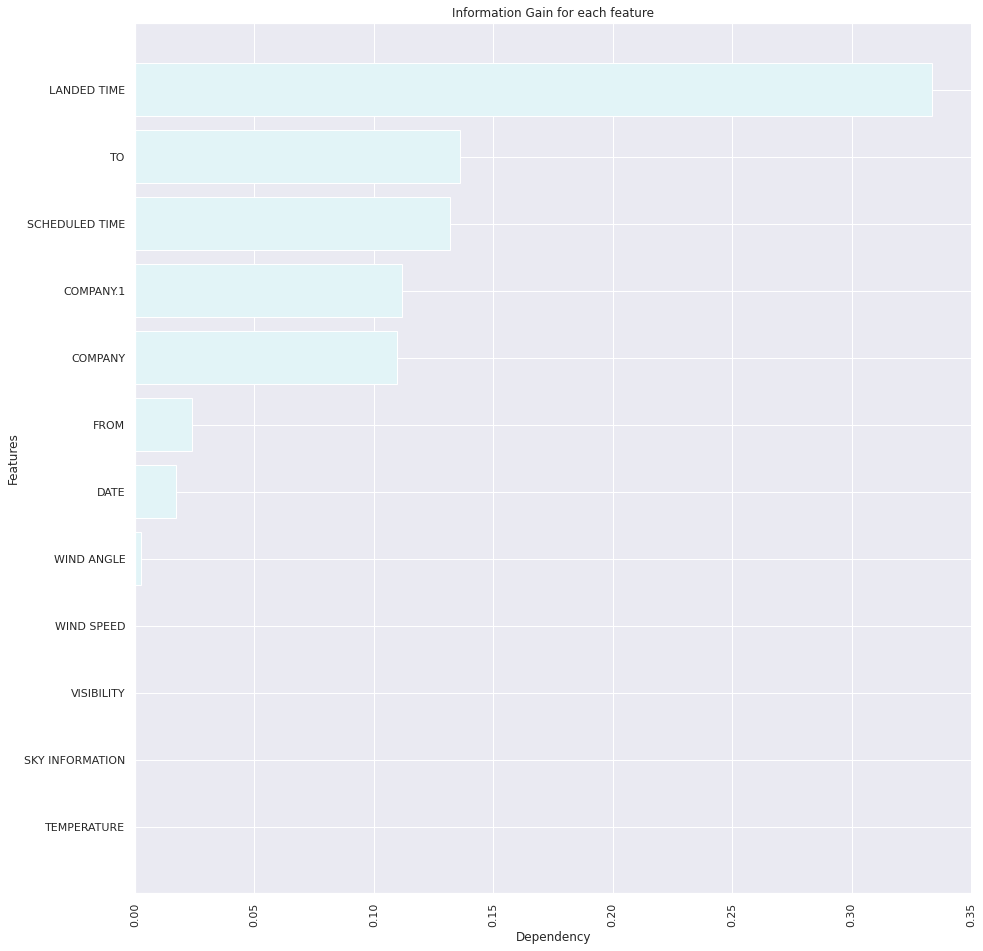

In [46]:
# acquiring figures for the data
fig,ax = plt.subplots()
#acquiring subplots into ax,fig
fig.set_size_inches(15,16)
#fixing its size
ax.barh(ig_importance.sort_values().index, ig_importance.sort_values().values)
#fixing bar graph data 
plt.xticks(rotation=90)
#to rotate the x axis labels by Xticks
plt.ylabel('Features')
plt.xlabel('Dependency')
plt.title('Information Gain for each feature')
#defining title name
plt.show()#to draw the bar graph 

In [47]:
t = PD.DataFrame(ig_importance.sort_values(), columns=['columns_name']).reset_index()#calling dataframe from pandas and converting feature importance in dataframe and sorting all values  and reseting index by function
#making df of important attribute
p = t['index'].tolist()#changing in list by using tolist function
# to list the index 
x = x.drop(p[0:7], axis=1)
# to drop the  columns
x.columns# to visualize columns data


Index(['COMPANY', 'LANDED TIME', 'TO', 'COMPANY.1', 'SCHEDULED TIME'], dtype='object')

In [48]:
# splitting the arrival database into fitting and testing 
from sklearn.model_selection import train_test_split
# assigning the attributes 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =42,  stratify=y ,shuffle=True) 

In [49]:
x_train.shape # to check the shape of train variable 

(5927, 5)

In [50]:
y_train.shape

(5927,)

In [51]:
#  applying smote technique for over sampling
from imblearn.over_sampling import SMOTE
#initializing the technique 
sm = SMOTE(random_state = 42)
# assigning the attributes 
x_res, y_res = sm.fit_resample(x_train, y_train)

In [52]:
x_res.shape # checking the shape after applying smote technique

(11526, 5)

In [53]:
y_res.shape  # checking the shape after applying smote technique

(11526,)

In [54]:
x_test.shape  # checking the shape of test variable

(1482, 5)

In [55]:
# importing XGB classifier
from xgboost import XGBClassifier
# initializing the model
model1 = XGBClassifier(max_depth=11, learning_rate=0.4)
# fitting the model
model1.fit(x_res, y_res)
# predict variable
pred1 = model1.predict(x_test)
# finding the accuracy
print(metrics.accuracy_score( y_test, pred1))


0.9102564102564102


In [56]:
from sklearn.metrics import classification_report, accuracy_score
# classification report 
print(classification_report(y_test, pred1)) 
print()
print('Accuracy: ', accuracy_score(y_test, pred1))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        66
           1       0.84      0.69      0.76        54
           2       0.76      0.83      0.80       125
           3       0.97      0.96      0.96       481
           4       0.94      0.94      0.94       444
           5       0.91      0.90      0.91       312

    accuracy                           0.91      1482
   macro avg       0.85      0.84      0.84      1482
weighted avg       0.91      0.91      0.91      1482


Accuracy:  0.9102564102564102


In [57]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by XGB of testing data is: %.3f' % precision_score(y_test, pred1,average='micro')) 
# checking the precision value
print('Recall by XGB of testing data is: %.3f' % recall_score(y_test, pred1,average='micro')) 
# checking the recall value
print('F1 score by XGB of testing data is: %.3f' % f1_score(y_test, pred1,average='micro')) 
# checking the f2 score

Precision by XGB of testing data is: 0.910
Recall by XGB of testing data is: 0.910
F1 score by XGB of testing data is: 0.910


In [58]:
# importing cm library
from sklearn.metrics import confusion_matrix
#initializing the cm
cm = confusion_matrix(y_test,pred1)

Text(66.5, 0.5, 'Original Values')

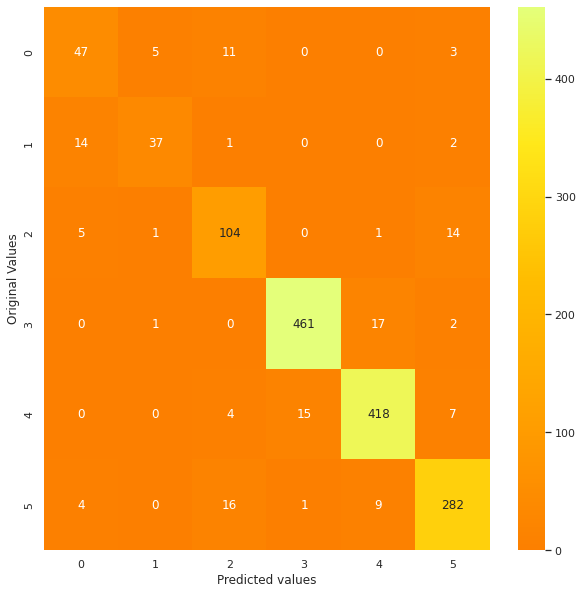

In [59]:
# making heat map 
import seaborn as sns
#assigining its size
plt.figure(figsize=(10,10))
# assigning its color
sns.heatmap(cm,annot=True, cmap=random.choice(cmap),  fmt='d')
# assigning its x axis name 
plt.xlabel('Predicted values')
# assigning its y-axis name 
plt.ylabel('Original Values')

In [60]:
# importing lightgbm classifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
# initializing the model
model2 = LGBMClassifier(max_depth=3, learning_rate=0.01)
# fitting the model
model2.fit(x_res, y_res)
# predict variable
pred2 = model1.predict(x_test)
# finding the accuracy
print(metrics.accuracy_score( y_test, pred2))

0.9102564102564102


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# classification report 
print(classification_report(y_test, pred2)) 
print()
print('Accuracy: ', accuracy_score(y_test, pred2))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        66
           1       0.84      0.69      0.76        54
           2       0.76      0.83      0.80       125
           3       0.97      0.96      0.96       481
           4       0.94      0.94      0.94       444
           5       0.91      0.90      0.91       312

    accuracy                           0.91      1482
   macro avg       0.85      0.84      0.84      1482
weighted avg       0.91      0.91      0.91      1482


Accuracy:  0.9102564102564102


In [62]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by LGBMClassifier of testing data is: %.3f' % precision_score(y_test, pred2,average='micro')) 
# checking the precision value
print('Recall by LGBMClassifier of testing data is: %.3f' % recall_score(y_test, pred2,average='micro')) 
# checking the recall value
print('F1 score by LGBMClassifier of testing data is: %.3f' % f1_score(y_test, pred2,average='micro')) 

Precision by LGBMClassifier of testing data is: 0.910
Recall by LGBMClassifier of testing data is: 0.910
F1 score by LGBMClassifier of testing data is: 0.910


In [63]:
# importing confusion matrix library
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred2)

Text(66.5, 0.5, 'Original Values')

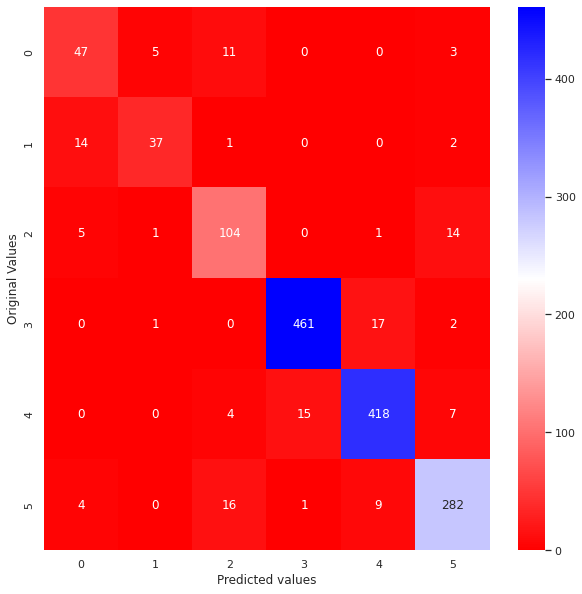

In [64]:
# plotting confusion matrix
import seaborn as sns
#assigining its size
plt.figure(figsize=(10,10))
# assigning its color
sns.heatmap(cm,annot=True,cmap=random.choice(cmap),  fmt='d')
# assigning its x axis name 
plt.xlabel('Predicted values')
# assigning its y-axis name 
plt.ylabel('Original Values')

In [65]:
#importing the model
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier()

In [66]:
# importing the AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
# initializing the model
model3 = AdaBoostClassifier(base_estimator=tree)
# fitting the model
model3.fit(x_res, y_res)
# predict variable
pred3 = model3.predict(x_test)
# finding the accuracy
print(metrics.accuracy_score( y_test, pred3))

0.8967611336032388


In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# classification report 
print(classification_report(y_test, pred3)) 
print()
print('Accuracy: ', accuracy_score(y_test, pred3))

              precision    recall  f1-score   support

           0       0.65      0.74      0.70        66
           1       0.81      0.63      0.71        54
           2       0.76      0.80      0.78       125
           3       0.95      0.95      0.95       481
           4       0.94      0.92      0.93       444
           5       0.88      0.90      0.89       312

    accuracy                           0.90      1482
   macro avg       0.83      0.82      0.83      1482
weighted avg       0.90      0.90      0.90      1482


Accuracy:  0.8967611336032388


In [68]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by AdaBoost of testing data is: %.3f' % precision_score(y_test, pred3,average='micro')) 
# checking the precision value
print('Recall by AdaBoost of testing data is: %.3f' % recall_score(y_test, pred3,average='micro')) 
# checking the recall value
print('F1 score by AdaBoost of testing data is: %.3f' % f1_score(y_test, pred3,average='micro')) 

Precision by AdaBoost of testing data is: 0.897
Recall by AdaBoost of testing data is: 0.897
F1 score by AdaBoost of testing data is: 0.897


In [69]:
# importing confusion matrix library
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred3)

Text(66.5, 0.5, 'Original Values')

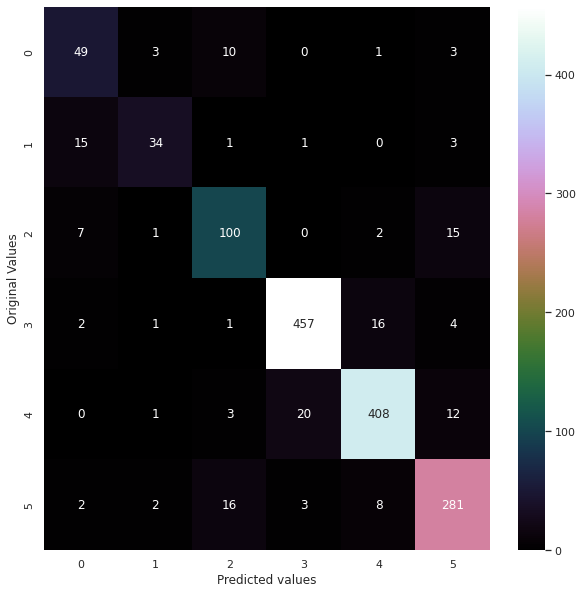

In [70]:
# plotting heat map
import seaborn as sns
#assigining its size
plt.figure(figsize=(10,10))
# assigning its color
sns.heatmap(cm,annot=True,cmap=random.choice(cmap),  fmt='d')
#assigining its x-axis name 
plt.xlabel('Predicted values')
#assigining its y-axis name 
plt.ylabel('Original Values')

# **SPLITTING THE DEPARTURE DATASET**

In [71]:
X=D_data.iloc[:,:-1] # SPLITTING THE DEPENDENT AND INDEPENDENT VARIABLE OF DEPARTURE DATASET
Y= D_data['CLASS']

In [72]:
X.shape  # CHECKING THE SHAPE OF X VARIABLE

(7057, 12)

In [73]:
Y.shape   # checking the shape of y variable 

(7057,)

In [74]:
features_cal_cmim = CMIM.cmim(X.values,Y.values, n_selected_features=44)
# performing feature selection
ext_fcmim = D_data.columns[features_cal_cmim]
X = D_data[ext_fcmim]
#to target the independent feature 
Y = D_data['CLASS']
# to target dependent column
# draw out the x , y data 
importance = mutual_info_classif(X, Y)
#identifying importance
ig_importance = PD.Series(importance, index=X.columns)
#examine the importance

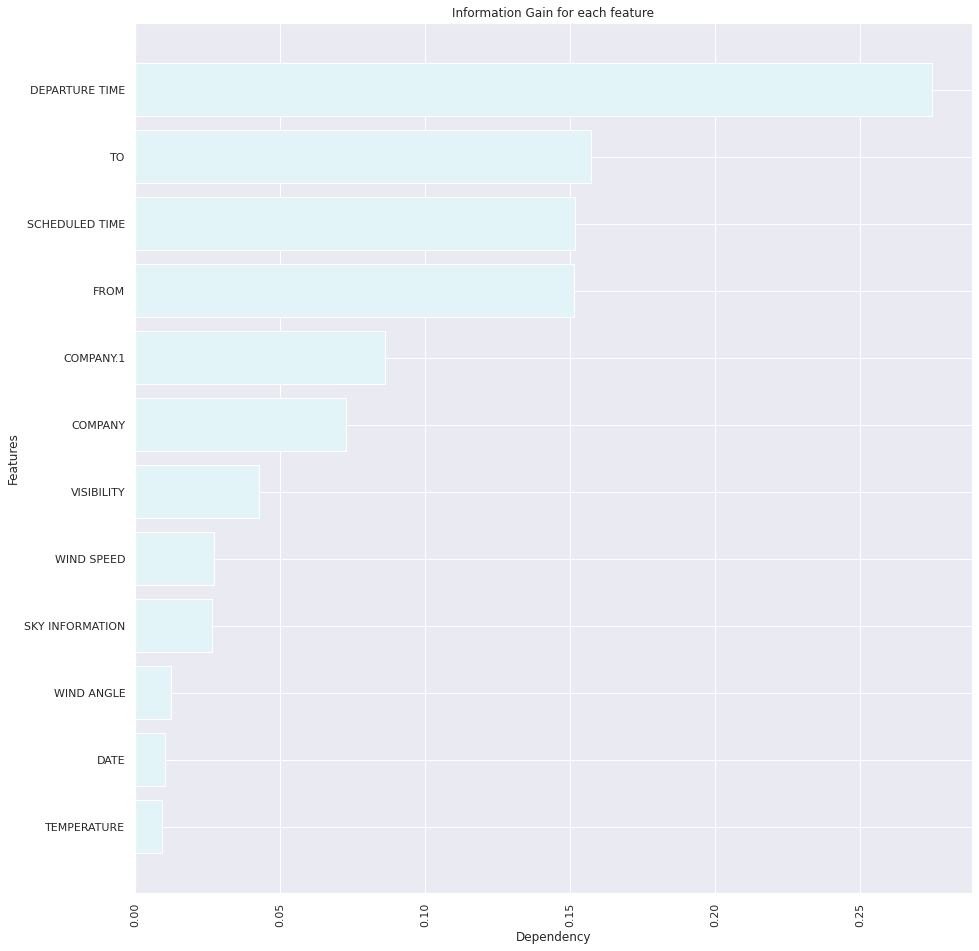

In [75]:
# acquiring figures for the data
fig,ax = plt.subplots()
#acquiring subplots into ax,fig
fig.set_size_inches(15,16)
#fixing its size
ax.barh(ig_importance.sort_values().index, ig_importance.sort_values().values)
#fixing bar graph data 
plt.xticks(rotation=90)
#to rotate the x axis labels by Xticks
plt.ylabel('Features')
plt.xlabel('Dependency')
plt.title('Information Gain for each feature')
#defining title name
plt.show()#to draw the bar graph 

In [76]:
t = PD.DataFrame(ig_importance.sort_values(), columns=['columns_name']).reset_index()#calling dataframe from oandas and converting feature importance in dataframe and sorting all values  and reseting index by function
#making df of important attribute
p = t['index'].tolist()#changing in list by using tolist function
# to list the index  
X = X.drop(p[0:6], axis=1)#dropping columns
# to drop the  columns
X.columns# to visualize columns data

Index(['COMPANY', 'DEPARTURE TIME', 'TO', 'FROM', 'COMPANY.1',
       'SCHEDULED TIME'],
      dtype='object')

In [77]:
X.shape # checking the shape of independent variable

(7057, 6)

In [78]:
Y.shape    # checking the shape of dependent variable

(7057,)

In [79]:
#  standard scaling 
from sklearn.preprocessing import StandardScaler
# initializing
sc = StandardScaler()
# to fit the transform
X = sc.fit_transform(X)

In [80]:
# applying smote technique for oversampling
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X, Y)

In [81]:
X_res.shape # checking shape 

(35058, 6)

In [82]:
# splitting the dataset into fitting and checking
from sklearn.model_selection import train_test_split 
# initializing the attributes
X_train, X_test, Y_train, Y_test = train_test_split(X_res,Y_res , test_size=0.2, random_state =42, shuffle=True)

In [83]:
X_train.shape # checking the shape of x train variable 

(28046, 6)

In [84]:
X_test.shape

(7012, 6)

In [85]:
# importing XGB classifier
from xgboost import XGBClassifier
# initializing the model
model1 = XGBClassifier(max_depth=2,learning_rate=0.3, n_estimators=999)
# to fit the model
model1.fit(X_res, Y_res)
# predict variable
Pred1 =model1.predict(X_test)
# finding the accuracy
print(metrics.accuracy_score( Y_test, Pred1))
# model1.score( X_test,Y_test)

0.9894466628636623


In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# classification report 
print(classification_report(Y_test, Pred1)) 
print()
print('Accuracy: ', accuracy_score(Y_test, Pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1187
           1       1.00      0.99      0.99      1162
           2       0.98      0.98      0.98      1174
           3       1.00      1.00      1.00      1142
           4       0.99      0.99      0.99      1184
           5       1.00      0.98      0.99      1163

    accuracy                           0.99      7012
   macro avg       0.99      0.99      0.99      7012
weighted avg       0.99      0.99      0.99      7012


Accuracy:  0.9894466628636623


In [87]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by XGB of testing data is: %.3f' % precision_score(Y_test, Pred1,average='micro')) 
# checking the precision value
print('Recall by XGB of testing data is: %.3f' % recall_score(Y_test, Pred1,average='micro')) 
# checking the recall value
print('F1 score by XGB of testing data is: %.3f' % f1_score(Y_test, Pred1,average='micro')) 
# checking the f2 score

Precision by XGB of testing data is: 0.989
Recall by XGB of testing data is: 0.989
F1 score by XGB of testing data is: 0.989


In [88]:
# importing cm library
from sklearn.metrics import confusion_matrix
# initialization
cm = confusion_matrix(Y_test,Pred1)

Text(66.5, 0.5, 'Original Values')

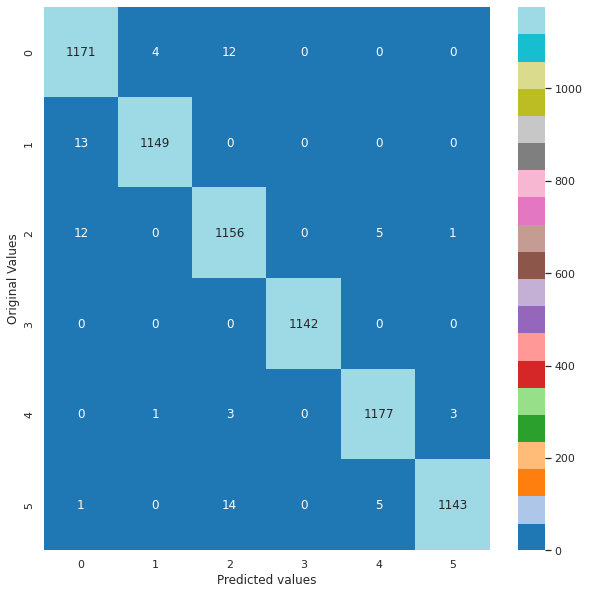

In [89]:
# making heat map 
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning its color
sns.heatmap(cm,annot=True,cmap=random.choice(cmap),  fmt='d')
# define its x-axis name
plt.xlabel('Predicted values')
# defining its y-axis name 
plt.ylabel('Original Values')

In [90]:
# importing lightgbm classifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
# initializing the model
model2 = LGBMClassifier( max_depth=3, n_estimators=100 , learning_rate=0.7 )
# fit the model
model2.fit(X_res, Y_res)
# predict variable
Pred2 =model1.predict(X_test)
# finding the accuracy
print(metrics.accuracy_score( Y_test, Pred2))

0.9894466628636623


In [92]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# classification report 
print(classification_report(Y_test, Pred2)) 
print()
print('Accuracy: ', accuracy_score(Y_test, Pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1187
           1       1.00      0.99      0.99      1162
           2       0.98      0.98      0.98      1174
           3       1.00      1.00      1.00      1142
           4       0.99      0.99      0.99      1184
           5       1.00      0.98      0.99      1163

    accuracy                           0.99      7012
   macro avg       0.99      0.99      0.99      7012
weighted avg       0.99      0.99      0.99      7012


Accuracy:  0.9894466628636623


In [93]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by LGBMClassifier of testing data is: %.3f' % precision_score(Y_test, Pred2,average='micro')) 
# checking the precision value
print('Recall by LGBMClassifier of testing data is: %.3f' % recall_score(Y_test, Pred2,average='micro')) 
# checking the recall value
print('F1 score by LGBMClassifier of testing data is: %.3f' % f1_score(Y_test, Pred2,average='micro')) 
# checking the f2 score

Precision by LGBMClassifier of testing data is: 0.989
Recall by LGBMClassifier of testing data is: 0.989
F1 score by LGBMClassifier of testing data is: 0.989


In [94]:
# importing CM library
from sklearn.metrics import confusion_matrix
# initialization
cm = confusion_matrix(Y_test,Pred2)

Text(66.5, 0.5, 'Original Values')

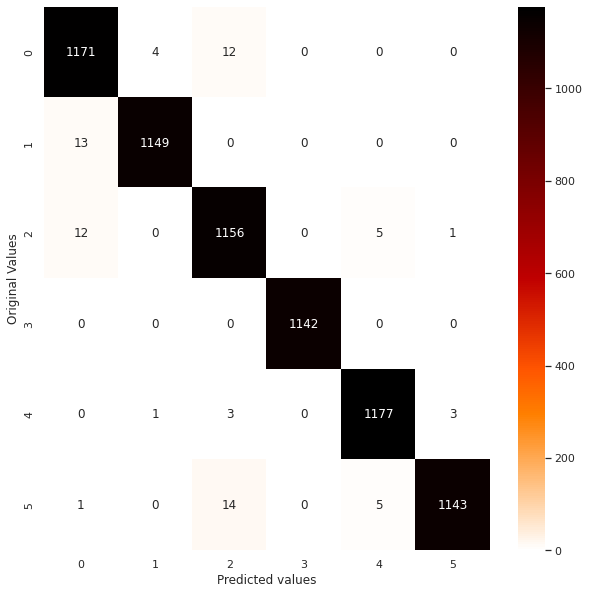

In [95]:
# plotting cm
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning heat map color
sns.heatmap(cm,annot=True,cmap=random.choice(cmap),  fmt='d')
# defining its x-axis name 
plt.xlabel('Predicted values')
# dfining its y-axis name
plt.ylabel('Original Values')

In [96]:
# importing the AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
# initializing the model
model3 = AdaBoostClassifier(base_estimator=tree)
# fitting the model
model3.fit(X_res, Y_res)
# predict variable
Pred3 =model3.predict(X_test)
# finding the accuracy
print(metrics.accuracy_score( Y_test, Pred3))

1.0


In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# classification report 
print(classification_report(Y_test, Pred3)) 
print()
print('Accuracy: ', accuracy_score(Y_test, Pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1187
           1       1.00      1.00      1.00      1162
           2       1.00      1.00      1.00      1174
           3       1.00      1.00      1.00      1142
           4       1.00      1.00      1.00      1184
           5       1.00      1.00      1.00      1163

    accuracy                           1.00      7012
   macro avg       1.00      1.00      1.00      7012
weighted avg       1.00      1.00      1.00      7012


Accuracy:  1.0


In [98]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by AdaBoost of testing data is: %.3f' % precision_score(Y_test, Pred3,average='micro')) 
# checking the precision value
print('Recall by AdaBoost of testing data is: %.3f' % recall_score(Y_test, Pred3,average='micro')) 
# checking the recall value
print('F1 score by AdaBoost of testing data is: %.3f' % f1_score(Y_test, Pred3,average='micro')) 

Precision by AdaBoost of testing data is: 1.000
Recall by AdaBoost of testing data is: 1.000
F1 score by AdaBoost of testing data is: 1.000


In [99]:
# importing confusion matrix library
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Pred3)

Text(66.5, 0.5, 'Original Values')

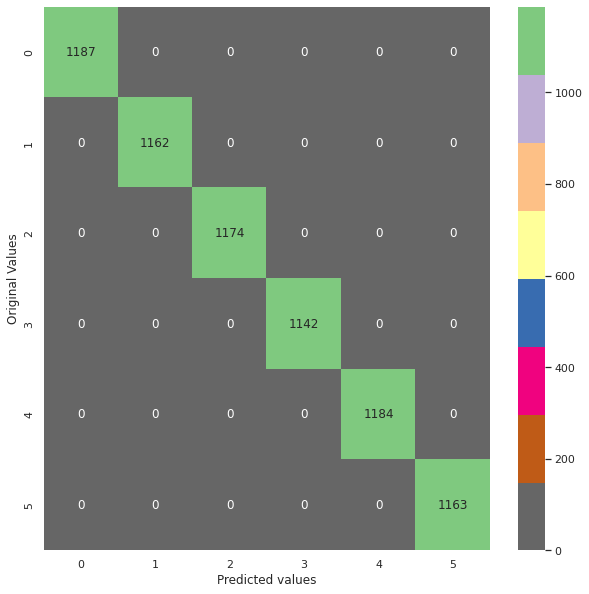

In [100]:
# plotting heat map
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning heat map color
sns.heatmap(cm,annot=True,cmap=random.choice(cmap),  fmt='d')
# defining its x-axis name
plt.xlabel('Predicted values')
# defining its y-axis name
plt.ylabel('Original Values')